## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
# Generate 50 points equally distributed between 0 and 20
X_org = np.linspace(0, 20, 50).reshape(50,1)

y = -1*X_org + 2
m = X_org.shape[0]

X = (X_org-np.mean(X_org)) / np.std(X_org) ##########################################

X = np.block([np.ones((m, 1)), X])


#### Plot your data points. 

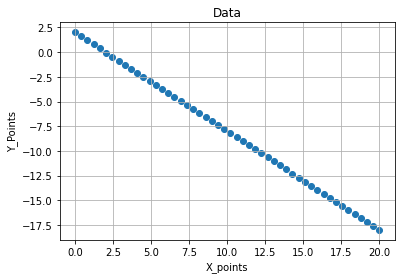

In [3]:
plt.scatter(X_org,y)
plt.xlabel("X_points")
plt.ylabel("Y_Points")
_ = plt.title("Data")
plt.grid()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def compute_cost(X, y, theta):
    diff = (X @ theta) - y
    return (diff.T @ diff)/(2*m)

In [5]:
def create_mini_batches(X, y, batch_size, shuff):
    m = X.shape[0]
    n_minibatches = m // batch_size
    mini_batches = []

#     print(n_minibatches)
#     print(m)
    if shuff:
        X, y = shuffle(X,y)
    t=0
    for t in range(0, n_minibatches):
        X_mini = X[t*batch_size: (t+1)*batch_size]
        y_mini = y[t*batch_size: (t+1)*batch_size]
        mini_batches.append((X_mini, y_mini))
    
    if m % batch_size != 0:
        X_mini = X[(t+1)*batch_size: m]
        y_mini = y[(t+1)*batch_size: m]
        mini_batches.append((X_mini, y_mini))
        
    return mini_batches



In [7]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def gradient_descent(X, y, theta, alpha, iters, batch_size, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]

    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            grads.append(np.linalg.norm(grad))
        
            theta = theta - (alpha*grad)
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])

            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break

            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
        

        
    return theta, cost[1:], H, thetas, iters
    


In [8]:
alpha = 0.2
iters = 50
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = gradient_descent(X, y, theta, alpha, iters, batch_size)
# cost

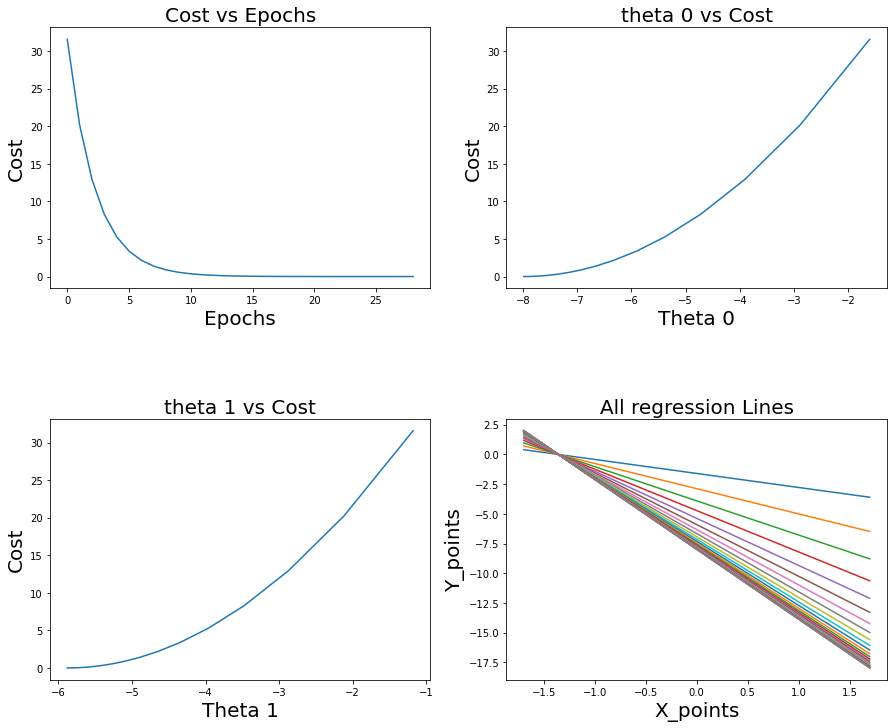

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

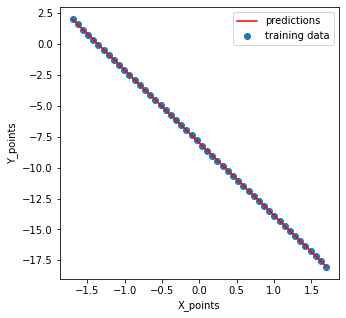

In [13]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

In [14]:
print("Accuracy:", r2_score(y, X@theta))

Accuracy: 0.9999931882826878


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

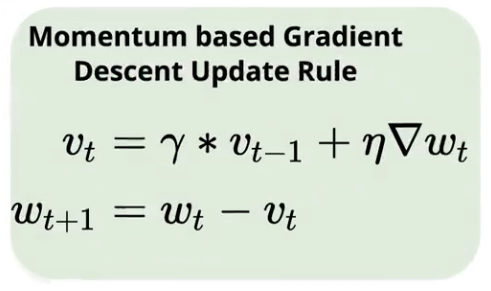

#### γ takes values between 0 and 1.
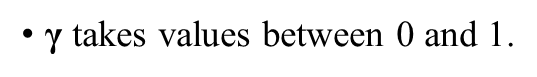

In [15]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def momentum_GD(X, y, theta, alpha, beta, iters, batch_size, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    vt = 0
    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            vt = (beta*vt) + (alpha*grad)
            grads.append(np.linalg.norm(vt))
        
            theta = theta - vt
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])
            
            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break
            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break


        
    return theta, cost[1:], H, thetas, iters
    


In [16]:
alpha = 0.3
beta = 0.5
iters = 50
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = momentum_GD(X, y, theta, alpha, beta, iters, batch_size)
# cost

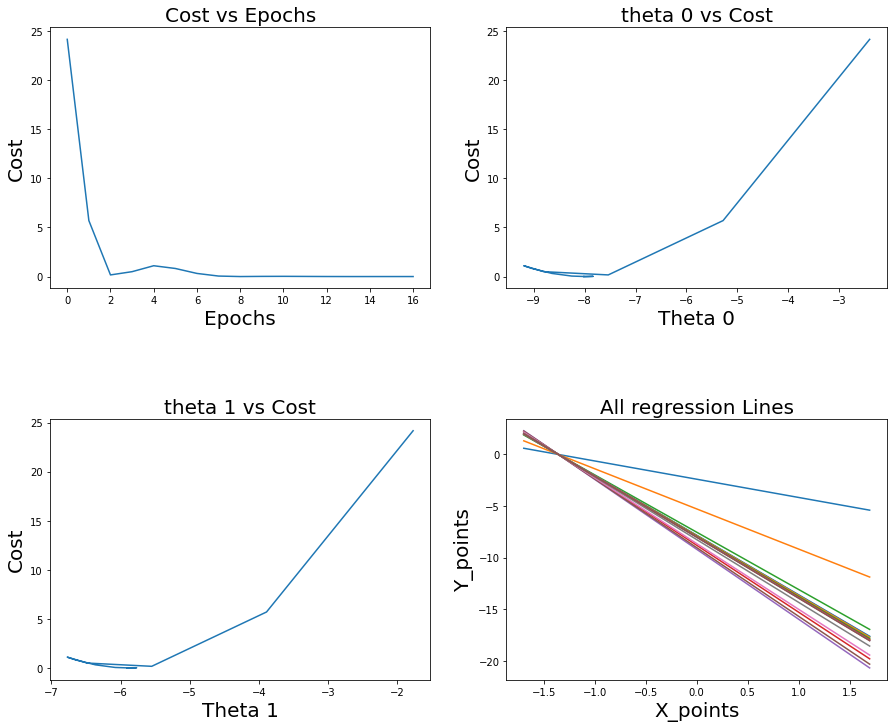

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

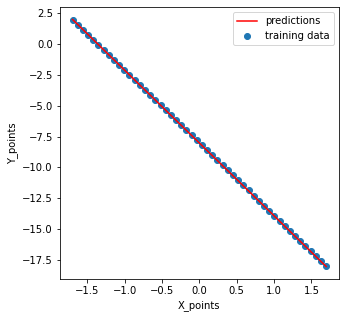

In [18]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

50
21
21
21


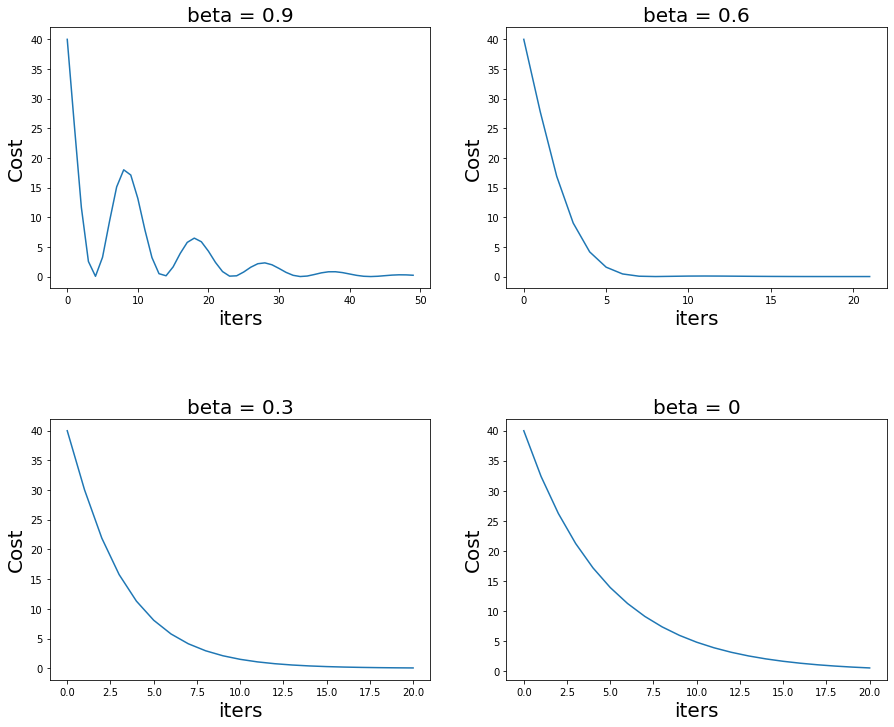

In [19]:
alpha = 0.1

betas = [0.9, 0.6, 0.3, 0]
iters = 50
n = X.shape[1]
batch_size = m


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

k=[(0,0),(0,1),(1,0),(1,1)] # For plotting
for i in range(len(betas)):
    theta = np.zeros((n,1))
    theta, cost, H, thetas, iters = momentum_GD(X, y, theta, alpha, betas[i], iters, batch_size)
    print(iters)
    # plot Cost vs Epochs
    ax[k[i][0], k[i][1]].plot(cost)
    ax[k[i][0], k[i][1]].set_xlabel('iters', fontsize = 20)
    ax[k[i][0], k[i][1]].set_ylabel("Cost", fontsize = 20)
    ax[k[i][0], k[i][1]].set_title(f"beta = {betas[i]}", fontsize = 20)


### Update your Batch GD for one variable  implementation to be NAG and check your results

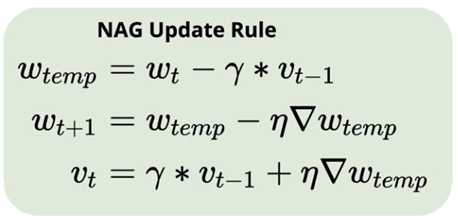

In [20]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def NAG_GD(X, y, theta, alpha, beta, iters, batch_size, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    vt = 0
    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            
            # look ahead step
            theta_tmp = theta - (beta*vt)
            
            h = (x_mini @ theta_tmp)
            H.append(h)
            y_hat = h - y_mini
            grad = (x_mini.T @ y_hat) / m
            
            theta = theta_tmp - (alpha * grad)
            vt = (beta*vt) + (alpha*grad)
            
            grads.append(np.linalg.norm(grad))
        
            
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])

            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break

            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
        

        
    return theta, cost[1:], H, thetas, iters
    


In [23]:
alpha = 0.1
beta = 0.6
iters = 50
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = NAG_GD(X, y, theta, alpha, beta, iters, batch_size)
# cost

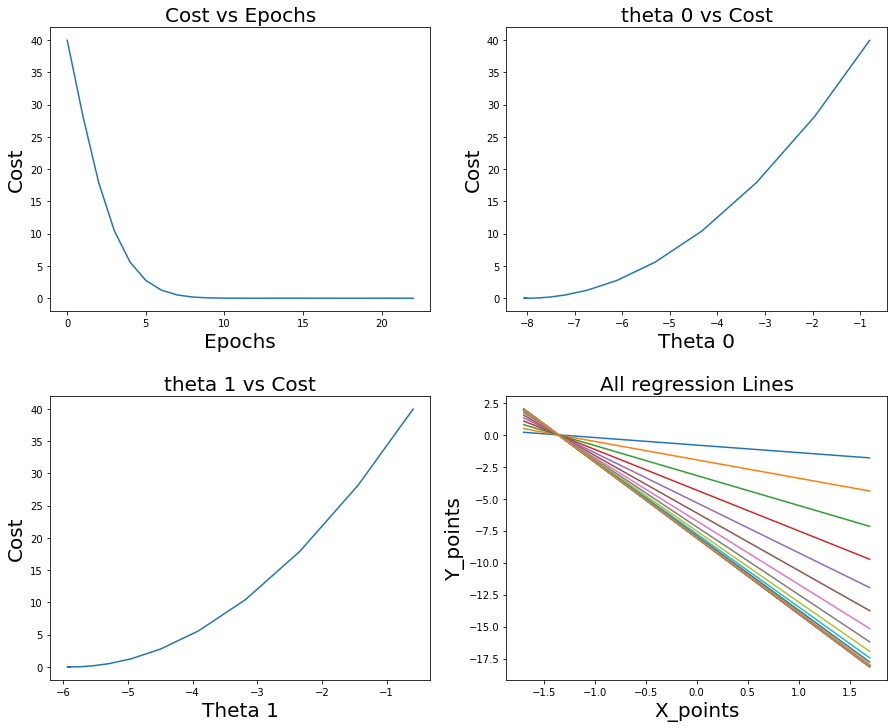

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.3)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

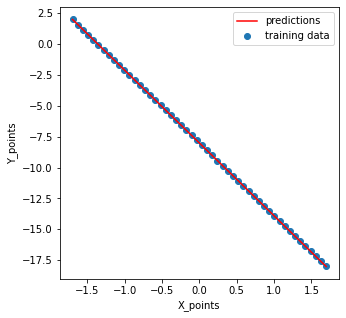

In [25]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

In [26]:
print("Accuracy:", r2_score(y, X@theta))

Accuracy: 0.9999966258061853


In [27]:
iters

22